In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
dataset = pd.read_csv("data/all_extracted_pubchem_mt_st_nt_compounds.tsv.gz", sep="\t")

In [4]:
dataset["tested targets"] = dataset["inactive targets"] + dataset["active targets"]
dataset["tested assays"] = dataset["inactive assays"] + dataset["active assays"]

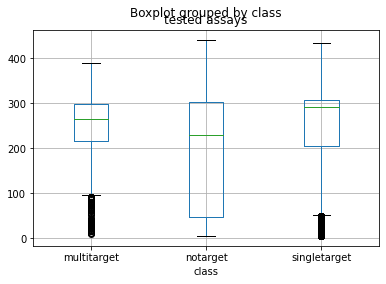

In [6]:
dataset.boxplot("tested assays", by="class")

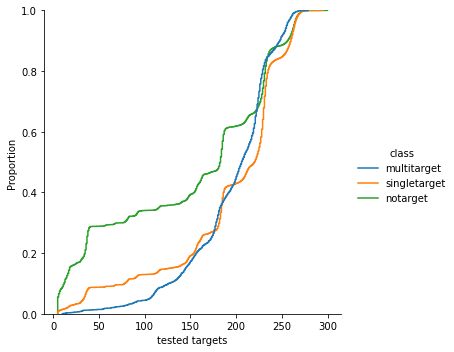

In [7]:
sns.displot(dataset, x="tested targets", hue="class", kind="ecdf")

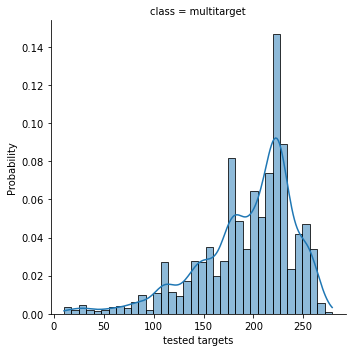

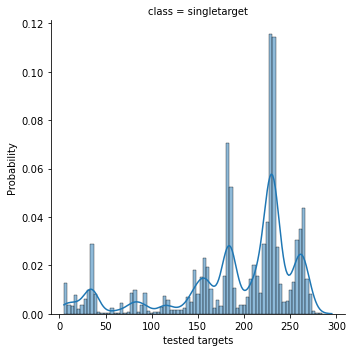

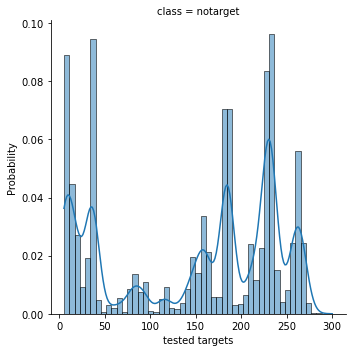

In [8]:
sns.displot(data=dataset[dataset["class"] == 'multitarget'],  x="tested targets", col="class", kde=True, stat='probability')
sns.displot(data=dataset[dataset["class"] == 'singletarget'],  x="tested targets", col="class", kde=True, stat='probability')
sns.displot(data=dataset[dataset["class"] == 'notarget'],  x="tested targets", col="class", kde=True, stat='probability')

No handles with labels found to put in legend.


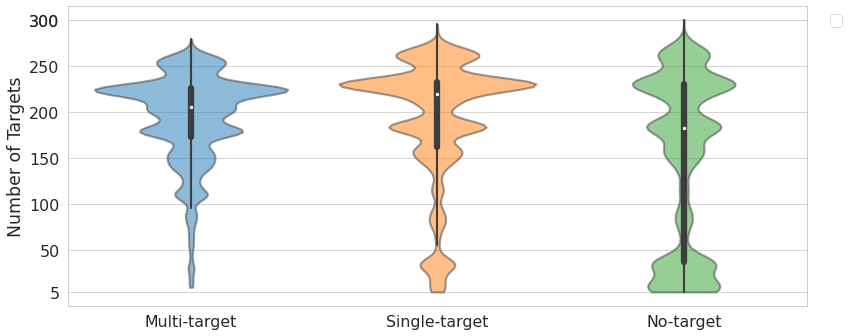

In [12]:
import matplotlib 
def setAlpha(ax,a):
    for art in ax.get_children():
        if isinstance(art, matplotlib.collections.PolyCollection):
            art.set_alpha(a)
            
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        fig = plt.figure(figsize=(12,5))

        p = sns.violinplot(y = "tested targets", x = "class", data=dataset, split=True, cut=0, bw=0.1, linewidth=2.1, alpha=0.5,saturation=1)
        #plt.setp(p.collections, alpha=.5)
        setAlpha(p, 0.5)
        plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
        yticks = p.get_yticks()[1:]
        yticks[0] = dataset["tested assays"].min()
        yticks[-1] = dataset["tested targets"].max()
        p.set_yticks(yticks)
        p.set_xticklabels(["Multi-target", "Single-target", "No-target"])
        p.set_xlabel("")
        p.set_ylabel("Number of Targets")
        #p.set_title("Tested Target Distribution")
        plt.tight_layout()
        #l = p.get_lines()[5]
        #l.set_linewidth(10)
        
        if not os.path.exists("plots/data-target-distribution.svg"):
            fig.savefig("plots/data-target-distribution.svg", bbox_inches='tight')
        if not os.path.exists("plots/data-target-distribution.png"):
            fig.savefig("plots/data-target-distribution.png", dpi=400, bbox_inches='tight')

In [13]:
dataset.groupby("class")[['tested targets','tested assays']].describe() 

tested targets                                                    \
                      count        mean        std   min    25%    50%    75%   
class                                                                           
multitarget          2809.0  194.257743  47.943949  10.0  173.0  206.0  226.0   
notarget           295395.0  147.980345  91.558775   5.0   37.0  183.0  230.0   
singletarget        61928.0  190.907893  67.476181   5.0  162.0  220.0  233.0   

                    tested assays                                              \
                max         count        mean         std   min    25%    50%   
class                                                                           
multitarget   279.0        2809.0  252.180135   68.591946  10.0  216.0  264.0   
notarget      300.0      295395.0  191.980876  123.384031   5.0   47.0  230.0   
singletarget  295.0       61928.0  249.279276   93.638255   5.0  205.0  291.0   

                            
                75%    max  
class                       
multitarget   298.0  390.0  
notarget      302.0  441.0  
singletarget  308.0  433.0